# Brief Analysis of House Prices Dataset

> Reference: https://www.kaggle.com/katotaka/kaggle-prediction-house-prices

In [49]:
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns
import numpy as np
from sklearn.linear_model import LinearRegression

import math
%matplotlib inline

Load dataset and check the data format briefly:

In [12]:
df = pd.read_csv("./train.csv")
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


Check a size of the training data and elements:

In [24]:
df.shape

(1460, 81)

In [25]:
df.keys()

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

Histgram of `SalePrice`:

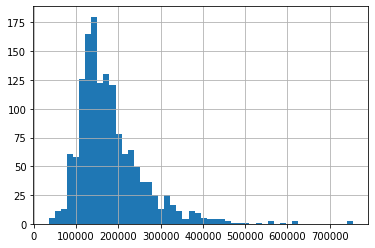

In [58]:
df_price = df["SalePrice"]
c = df_price.shape[0]
bins = round(1 + math.log2(c)) # Sturges's formula
df_price.hist(bins = 50)

Histgram of `YearBuilt`:

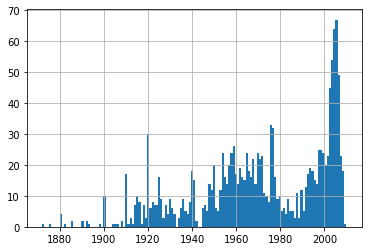

In [28]:
df_yrbuilt = df["YearBuilt"]
bins = df_yrbuilt.max() - df_yrbuilt.min() + 1  # in order to make bin width to be 1 year.
df_yrbuilt.hist(bins = bins)

## Apply simple linear regression:

Train on the training dataset:

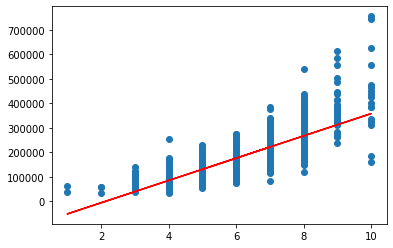

In [41]:
X = df[["OverallQual"]].values # .values returns dtype of numpy.ndarray
y = df_price.values

lr = LinearRegression()
lr.fit(X, y)

plt.scatter(X, y)
plt.plot(X, lr.predict(X), c="red")
plt.show()

Predict `"SalePrices"` values using trained model:

In [59]:
df_test = pd.read_csv("./test.csv")
X_test = df_test[["OverallQual"]].values

y_test_pred = lr.predict(X_test)
y_test_pred

array([130972.93345074, 176408.73604384, 130972.93345074, ...,
       130972.93345074, 130972.93345074, 221844.53863694])

Save predicted result in the submission format:

In [62]:
df_test["SalePrice"] = y_test_pred # Add predicted results
df_submit = df_test[["Id", "SalePrice"]]
df_submit.head()

,Id,SalePrice
0,1461,130972.933451
1,1462,176408.736044
2,1463,130972.933451
3,1464,176408.736044
4,1465,267280.341230


In [63]:
df_submit.to_csv("submission.csv")

# More complecated analysis

At first, let's describe more sexy histgram, instead of `df_price.hist()`

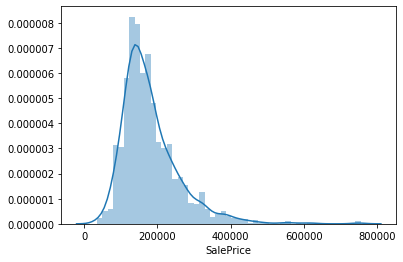

In [70]:
sns.distplot(df.SalePrice)